## 📌 Introdução

A análise exploratória de dados (EDA - Exploratory Data Analysis) é uma etapa fundamental em qualquer projeto de ciência de dados. É por meio dela que obtemos uma compreensão inicial dos dados, identificamos padrões, tendências, anomalias e formamos hipóteses que guiarão análises mais aprofundadas ou modelos preditivos.

Neste notebook, aplico técnicas de EDA ao dataset "Tips", amplamente utilizado para fins educacionais em ciência de dados. O conjunto de dados contém informações sobre gorjetas deixadas por clientes em um restaurante, com variáveis como:

* Valor total da conta (total_bill)
* Valor da gorjeta (tip)
* Sexo do cliente (sex)
* Dia da semana (day)
* Horário da refeição (time)
* Número de pessoas na mesa (size)
* Se o cliente era fumante ou não (smoker)

## 🎯 Objetivo

O objetivo principal deste projeto é explorar e compreender os fatores que influenciam o valor das gorjetas, buscando identificar padrões e relações entre variáveis que possam oferecer insights relevantes para o negócio, como:

* Existe relação entre o valor da conta e a gorjeta?
* Há diferenças no comportamento entre clientes fumantes e não fumantes?
* Qual o impacto do tamanho do grupo nas gorjetas?
* Gorjetas variam conforme o dia da semana ou o horário da refeição?

## 🛠️ Ferramentas utilizadas

* Python
* Pandas (manipulação de dados)
* Seaborn e Matplotlib (visualizações)
* NumPy (operações numéricas)
* Estatísticas descritivas e análise de correlação

In [1]:
# Carregando bibliotecas

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Configurar estilo dos gráficos para melhor visualização

sns.set_style("whitegrid")

In [3]:
# Carregando base de dados

dados = sns.load_dataset('tips')

In [4]:
# Visualização base de dados

dados.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### **Análise Exploratória de Dados**

In [5]:
# Informações sobre o dataset

print("Informações do dataset\n")
print(dados.info())

Informações do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


In [6]:
# Estatística Descritiva

print("Estatísticas descritivas\n")
print(dados.describe())

Estatísticas descritivas

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


In [7]:
# Verificando valores ausentes

print("Valores ausentes por coluna\n")
print(dados.isnull().sum())

Valores ausentes por coluna

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [8]:
# Feature engineering: criar coluna de percentual de gorjeta

dados['tip_percentage'] = (dados['tip'] / dados['total_bill']) * 100

**Análise Univariada**

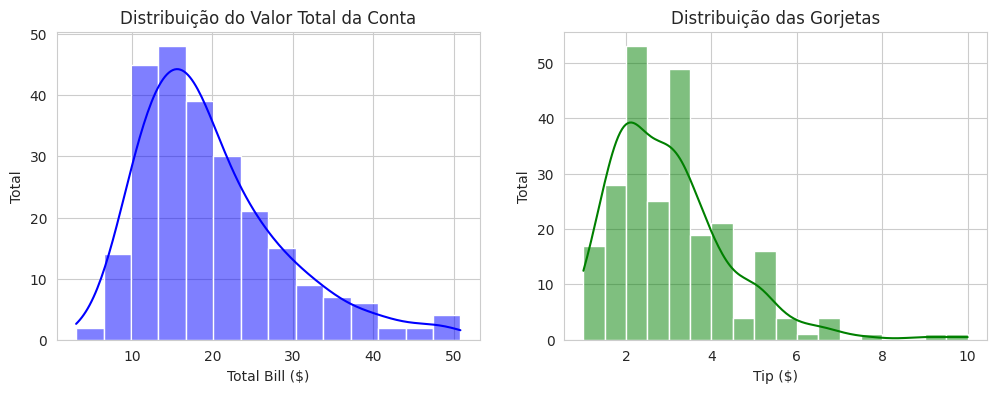

In [9]:
# Histograma para 'total_bill' e 'tip'

plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
sns.histplot(dados['total_bill'], kde = True, color = 'blue')
plt.title('Distribuição do Valor Total da Conta')
plt.xlabel('Total Bill ($)')
plt.ylabel('Total')

plt.subplot(1, 2, 2)
sns.histplot(dados['tip'], kde = True, color = 'green')
plt.title('Distribuição das Gorjetas')
plt.xlabel('Tip ($)')
plt.ylabel('Total')

plt.show()

**Observação**

<p align="justify">
A distribuição do valor total das contas (total_bill) apresenta uma assimetria à direita, com a maior concentração de valores entre 15 e 20, indicando que a maioria das transações ocorre nesse intervalo. A cauda se estende até 50, sugerindo a presença de outliers ou gastos atípicos de maior valor, conforme corroborado pela curva KDE. Para as gorjetas (tip), a distribuição também é assimétrica à direita, com pico entre 2 e 3, e uma cauda que alcança 10, refletindo que, embora a maioria das gorjetas seja modesta, há casos de valores mais elevados. Esses padrões indicam uma relação potencialmente proporcional entre total_bill e tip, o que pode ser validado com uma análise de correlação ou gráfico de dispersão.

<p align="justify">
A semelhança nas formas das distribuições sugere que o comportamento de gasto segue uma tendência comum em ambientes de restaurantes, onde a maioria dos clientes opera em faixas de valor moderadas, mas com exceções que elevam a média.

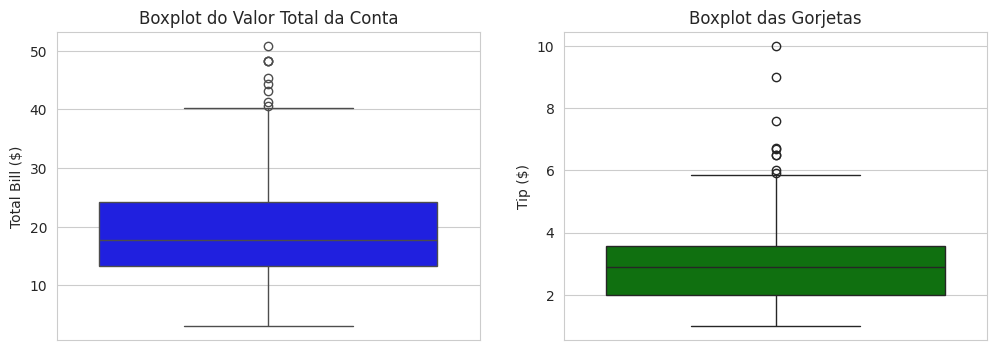

In [10]:
# Boxplot para detectar outliers em 'total_bill' e 'tip'

plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(y = dados['total_bill'], color = 'blue')
plt.title('Boxplot do Valor Total da Conta')
plt.ylabel('Total Bill ($)')

plt.subplot(1, 2, 2)
sns.boxplot(y = dados['tip'], color = 'green')
plt.title('Boxplot das Gorjetas')
plt.ylabel('Tip ($)')

plt.show()

**Observação**

<p align="justify">
O boxplot do valor total das contas (total_bill) mostra que a mediana está em torno de 20, com o intervalo interquartil (IQR) entre aproximadamente 15 e 25. Os limites inferior e superior do boxplot se estendem até cerca de 10 e 40, mas há diversos outliers acima de 40, alcançando até 50, indicando a presença de contas significativamente mais altas que a maioria. Para as gorjetas (tip), a mediana está próxima de 3, com o IQR entre 2 e 4, e limites que vão de 1 a 6, apresentando outliers até 10, o que evidencia gorjetas atipicamente altas em relação à distribuição central.

<p align="justify">
Esses boxplots confirmam a assimetria à direita observada nos histogramas anteriores, com caudas superiores mais longas em ambas as variáveis. A presença de outliers sugere que uma análise mais detalhada desses casos extremos pode ser útil para entender fatores como o perfil dos clientes ou contextos específicos (e.g., tamanho da mesa ou tipo de refeição) que levam a esses valores elevados, potencialmente orientando estratégias de negócio direcionadas a esses segmentos.

**Análise Bivariada**

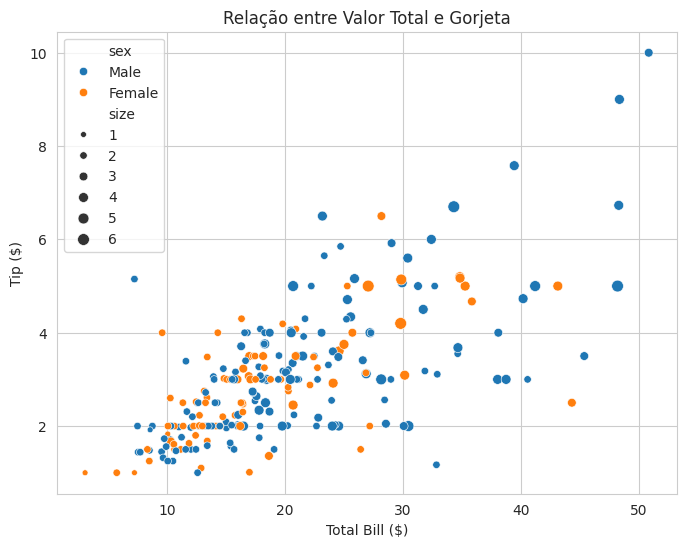

In [11]:
# Gráfico de dispersão: relação entre 'total_bill' e 'tip'

plt.figure(figsize = (8, 6))
sns.scatterplot(x = 'total_bill', y = 'tip', hue = 'sex', size = 'size', data = dados)
plt.title('Relação entre Valor Total e Gorjeta')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')

plt.show()

**Observação**

<p align="justify">
O gráfico de dispersão revela uma tendência positiva entre total_bill e tip, indicando que gorjetas tendem a aumentar conforme o valor total da conta cresce, embora a relação não seja estritamente linear, com maior variabilidade em contas mais altas (acima de 30). A diferenciação por sexo (sex) mostra que tanto clientes masculinos (azul) quanto femininos (laranja) seguem essa tendência, sem uma distinção clara entre os grupos, enquanto o tamanho do grupo (size) – variando de 1 a 6 – sugere que grupos maiores (tamanhos 5 e 6) estão associados a contas e gorjetas mais altas, como visto pelos pontos maiores concentrados em valores superiores.

<p align="justify">
A dispersão dos pontos indica que outros fatores podem influenciar as gorjetas além do valor da conta e do tamanho do grupo, como preferências individuais ou contexto da refeição.

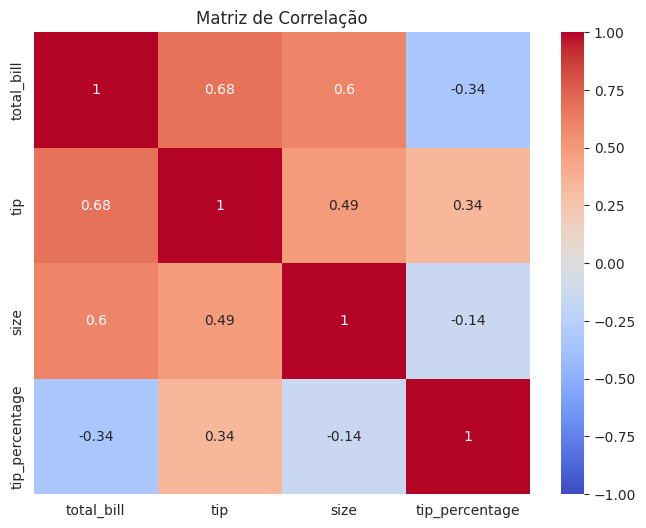

In [12]:
# Matriz de correlação para variáveis numéricas

plt.figure(figsize = (8, 6))
corr = dados.select_dtypes(include = ['float64', 'int64']).corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('Matriz de Correlação')

plt.show()

**Observação**

<p align="justify">
A matriz de correlação mostra que total_bill e tip apresentam uma correlação positiva moderada (0.68), confirmando a tendência observada no gráfico de dispersão de que gorjetas tendem a aumentar com o valor da conta, embora outros fatores também influenciem. Da mesma forma, total_bill e size (0.6), e tip e size (0.49) exibem correlações positivas, indicando que grupos maiores estão associados a contas e gorjetas mais altas. Já tip_percentage tem uma correlação negativa com total_bill (-0.34) e size (-0.14), sugerindo que contas ou grupos maiores tendem a ter percentuais de gorjeta menores, enquanto sua correlação com tip (0.34) indica que gorjetas absolutas maiores podem estar associadas a percentuais ligeiramente mais altos.

<p align="justify">
Esses resultados apontam para padrões comportamentais relevantes: enquanto valores absolutos de gorjetas crescem com contas maiores, a proporção da gorjeta em relação à conta diminui, o que pode refletir uma tendência de clientes a limitar o percentual em contas altas.

**Análise Categórica**

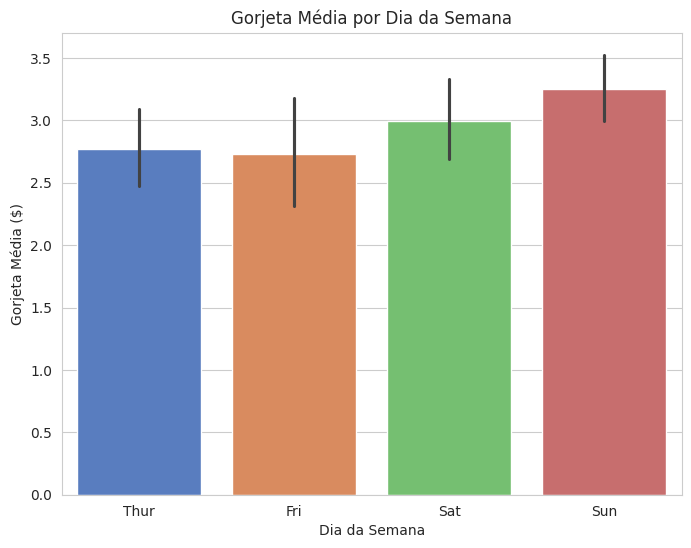

In [13]:
# Gorjeta média por dia da semana

plt.figure(figsize = (8, 6))
sns.barplot(x = 'day', y = 'tip', data = dados, hue='day', legend=False, palette = 'muted')
plt.title('Gorjeta Média por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Gorjeta Média ($)')

plt.show()

**Observação**

<p align="justify">
O gráfico de barras mostra a gorjeta média por dia da semana, com valores variando entre 2.5 e 3.2. O domingo (Sun) apresenta a maior média, próxima de 3.2, seguido pelo sábado (Sat) com cerca de $3.0, enquanto sexta-feira (Fri) e quinta-feira (Thur) têm médias menores, em torno de 2.7 e 2.8, respectivamente. As barras de erro indicam variabilidade nos dados, com o domingo mostrando maior dispersão, sugerindo que as gorjetas nesse dia podem ser mais inconsistentes.

<p align="justify">
Essa variação sugere que os finais de semana, especialmente o domingo, podem estar associados a gorjetas mais altas, possivelmente devido a maior movimento, grupos maiores ou ocasiões especiais.

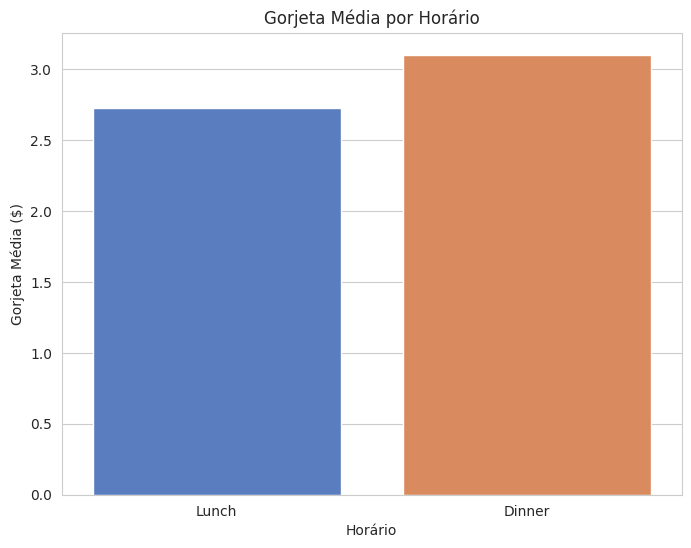

In [14]:
# Gorjeta média por horário (almoço ou jantar)

plt.figure(figsize=(8, 6))
sns.barplot(x='time', y='tip', data=dados,
            hue='time', errorbar=None, legend=False,
            palette='muted')
plt.title('Gorjeta Média por Horário')
plt.xlabel('Horário')
plt.ylabel('Gorjeta Média ($)')

plt.show()

**Observação**

<p align="justify">
O gráfico de barras indica que a gorjeta média é ligeiramente mais alta no jantar (Dinner), com valor próximo de 3.0, em comparação ao almoço (Lunch), que fica em torno de 2.7. A ausência de barras de erro sugere baixa variabilidade nesses dados agregados, reforçando que a diferença entre os horários é consistente. Essa diferença pode estar relacionada a fatores como o valor médio das contas ou o tamanho dos grupos, que tendem a ser maiores no jantar.

<p align="justify">
O resultado sugere que o horário do serviço influencia o comportamento de gorjetas, possivelmente devido a ocasiões mais formais ou gastos maiores no jantar.

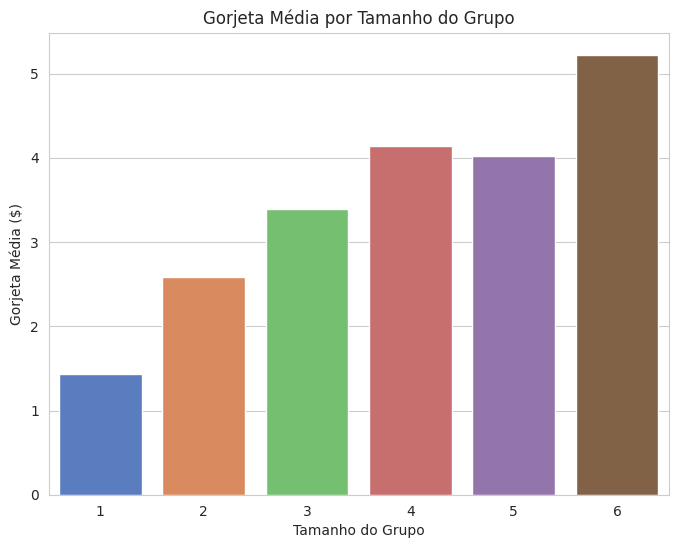

In [15]:
# Gorjeta média por tamanho do grupo

plt.figure(figsize=(8, 6))
sns.barplot(x = 'size', y = 'tip', data = dados,
            hue = 'size', errorbar = None, legend = False,
            palette = 'muted')
plt.title('Gorjeta Média por Tamanho do Grupo')
plt.xlabel('Tamanho do Grupo')
plt.ylabel('Gorjeta Média ($)')

plt.show()

**Observação**

<p align="justify">
O gráfico de barras mostra que a gorjeta média aumenta com o tamanho do grupo, variando de cerca de 1.5 para grupos de 1 pessoa até 5.0 para grupos de 6 pessoas. A tendência é consistente, com grupos de 2 a 5 pessoas apresentando gorjetas médias de aproximadamente 2.5, 3.5, 4.0 e 4.5, respectivamente, indicando uma relação positiva entre o número de pessoas e o valor absoluto da gorjeta. Isso alinha-se com a correlação moderada entre size e tip (0.49) observada na matriz de correlação.

<p align="justify">
Embora a gorjeta absoluta cresça com o tamanho do grupo, é importante notar que a matriz de correlação mostrou uma correlação negativa entre size e tip_percentage (-0.14), sugerindo que o percentual da gorjeta pode diminuir em grupos maiores.

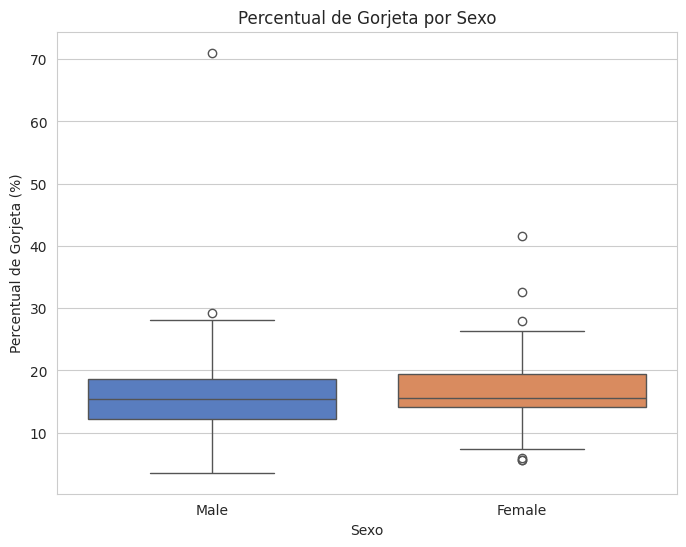

In [16]:
# Boxplot do percentual de gorjeta por sexo

plt.figure(figsize=(8, 6))
sns.boxplot(x = 'sex', y = 'tip_percentage', data = dados,
            hue = 'sex',palette = 'muted', legend = False)
plt.title('Percentual de Gorjeta por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Percentual de Gorjeta (%)')

plt.show()

**Observação**

<p align="justify">
O boxplot do percentual de gorjeta (tip_percentage) por sexo mostra que a mediana para ambos os grupos, masculino (Male) e feminino (Female), está próxima de 15-20%, com o intervalo interquartil (IQR) centrado em torno de 10-20%. Há uma leve sobreposição entre as distribuições, mas os dados indicam uma variabilidade maior para mulheres, com outliers alcançando até 60%, enquanto para homens os valores extremos chegam a cerca de 40%. Isso sugere que, embora a mediana seja semelhante, as gorjetas percentuais de mulheres podem apresentar picos mais altos de forma menos frequente.

<p align="justify">
A presença de outliers, especialmente em mulheres, pode indicar contextos específicos (e.g., ocasiões especiais ou contas maiores) que influenciam o percentual de gorjeta. Dado que a matriz de correlação mostrou uma correlação negativa entre tip_percentage e total_bill (-0.34), uma análise cruzada com o valor da conta poderia esclarecer se esses outliers estão associados a transações de menor valor, justificando percentuais mais altos.

**Análise de Interações Categóricas**

<Figure size 1000x600 with 0 Axes>

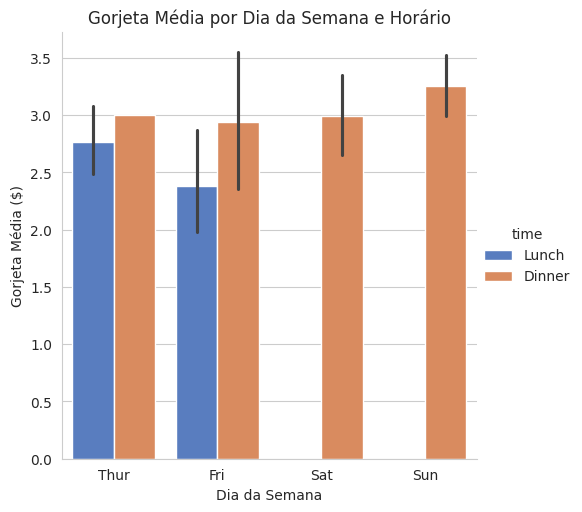

In [17]:
# Gorjeta média por dia e horário

plt.figure(figsize = (10, 6))
sns.catplot(x = 'day', y = 'tip', hue = 'time', kind = 'bar', data = dados, palette = 'muted')
plt.title('Gorjeta Média por Dia da Semana e Horário')
plt.xlabel('Dia da Semana')
plt.ylabel('Gorjeta Média ($)')

plt.show();

**Observação**

<p align="justify">
O gráfico de barras mostra a gorjeta média por dia da semana e horário, com time dividido entre almoço (Lunch) e jantar (Dinner). No geral, o jantar apresenta gorjetas médias mais altas que o almoço em todos os dias, com valores variando entre 2.5 e 3.5. Quinta-feira (Thur) é o único dia com dados para ambos os horários, onde o jantar tem média de cerca de 3.0, enquanto o almoço fica em torno de 2.5. Nos outros dias (Fri, Sat, Sun), apenas o jantar é registrado, com médias de aproximadamente 2.7, 3.0 e 3.2, respectivamente, sendo o domingo o dia com maior média.

<p align="justify">
A diferença entre almoço e jantar na quinta-feira sugere que o horário impacta as gorjetas, possivelmente devido a contas mais altas ou contextos sociais distintos no jantar, como já indicado pela correlação entre total_bill e tip (0.68). A ausência de dados de almoço nos outros dias limita a comparação, mas a tendência de gorjetas mais altas no jantar reforça a necessidade de analisar o comportamento por horário, potencialmente cruzando com variáveis como size ou total_bill para entender melhor esses padrões.

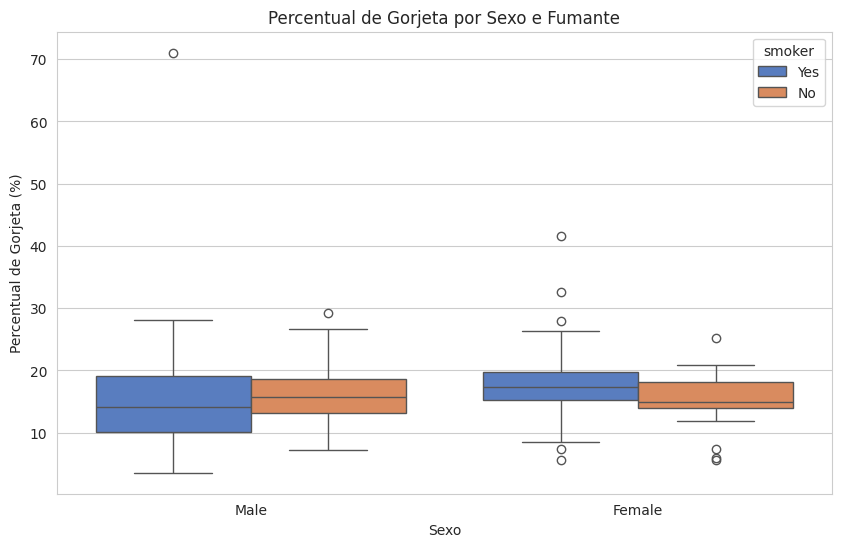

In [18]:
# Percentual de gorjeta por sexo e fumante

plt.figure(figsize = (10, 6))
sns.boxplot(x = 'sex', y = 'tip_percentage', hue = 'smoker', data = dados, palette = 'muted')
plt.title('Percentual de Gorjeta por Sexo e Fumante')
plt.xlabel('Sexo')
plt.ylabel('Percentual de Gorjeta (%)')

plt.show()

**Observação**

<p align="justify">
O boxplot do percentual de gorjeta (tip_percentage) por sexo e condição de fumante (smoker) mostra que a mediana para ambos os sexos (Male e Female) e grupos (fumantes e não fumantes) está em torno de 15-20%, com o intervalo interquartil (IQR) variando entre 10-20%. Não fumantes (No) de ambos os sexos apresentam uma mediana ligeiramente mais alta que fumantes (Yes), mas a diferença é pequena. Outliers são observados em todos os grupos, com percentuais de gorjeta alcançando até 70% em homens fumantes e 40-50% nos outros grupos, indicando maior variabilidade em gorjetas percentuais para fumantes, especialmente homens.

<p align="justify">
A sobreposição significativa entre as distribuições sugere que o status de fumante não tem um impacto claro no percentual de gorjeta, mas a presença de outliers mais extremos em fumantes pode indicar comportamentos específicos, como gorjetas generosas em contextos sociais associados ao hábito de fumar.

**Análise Temporal Implícita**

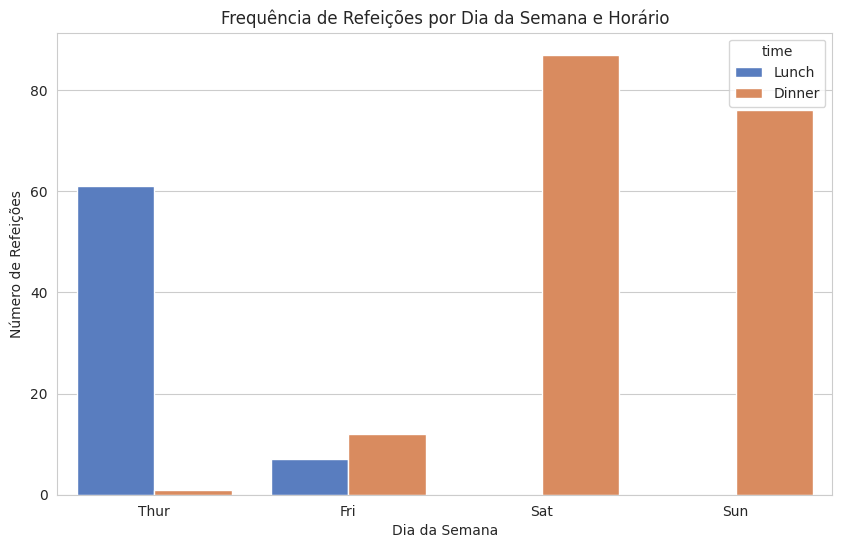

In [19]:
# Frequência de refeições por dia e horário

plt.figure(figsize = (10, 6))
sns.countplot(x = 'day', hue = 'time', data = dados, palette = 'muted')
plt.title('Frequência de Refeições por Dia da Semana e Horário')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Refeições')

plt.show()

**Observação**

<p align="justify">
O gráfico de contagem mostra a frequência de refeições por dia da semana e horário, com uma clara predominância de jantares (Dinner) sobre almoços (Lunch) na maioria dos dias. Quinta-feira (Thur) apresenta cerca de 60 refeições, quase todas almoços, com um número baixo de jantares. Sexta-feira (Fri) tem uma distribuição equilibrada, com cerca de 10 almoços e 15 jantares, enquanto sábado (Sat) e domingo (Sun) são dominados por jantares, com aproximadamente 80 e 75 refeições, respectivamente, e poucos ou nenhum almoço registrado.

<p align="justify">
Essa distribuição reflete um padrão onde almoços são mais frequentes no início da semana (especialmente quinta-feira), possivelmente devido a horários de trabalho, enquanto jantares predominam nos fins de semana, sugerindo maior atividade social ou lazer.

**Análise de Outliers**

In [20]:
# Calcular limites do boxplot para 'tip'
Q1 = dados['tip'].quantile(0.25)
Q3 = dados['tip'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Filtrar outliers
outliers = dados[dados['tip'] > upper_bound]

# Resumo dos outliers
print("\nCaracterísticas dos outliers de gorjeta\n")
print(outliers[['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']].describe())
print("\nDistribuição por dia\n")
print(outliers['day'].value_counts())


Características dos outliers de gorjeta

       total_bill        tip      size
count    9.000000   9.000000  9.000000
mean    37.100000   7.214444  3.888889
std     10.081375   1.403203  0.927961
min     23.170000   5.920000  3.000000
25%     29.030000   6.500000  3.000000
50%     34.300000   6.700000  4.000000
75%     48.270000   7.580000  4.000000
max     50.810000  10.000000  6.000000

Distribuição por dia

day
Sat     6
Sun     2
Thur    1
Fri     0
Name: count, dtype: int64


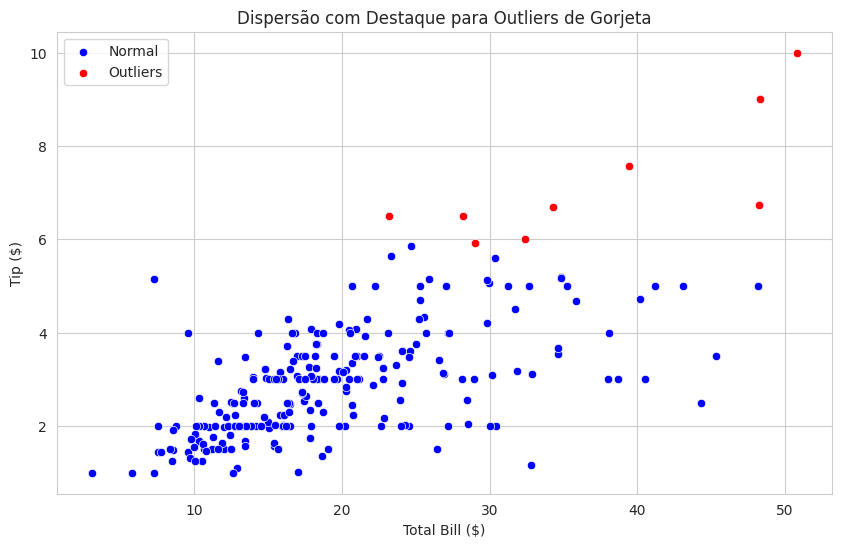

In [21]:
# Gráfico de dispersão destacando outliers

plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'total_bill', y = 'tip', data = dados, color = 'blue', label = 'Normal')
sns.scatterplot(x = 'total_bill', y = 'tip', data = outliers, color = 'red', label = 'Outliers')
plt.title('Dispersão com Destaque para Outliers de Gorjeta')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')

plt.legend()

plt.show()

**Observação**

<p align="justify">
O gráfico de dispersão destaca os outliers de gorjetas (tip) em vermelho, mostrando que eles se concentram principalmente em contas (total_bill) entre 20 e 50, com gorjetas variando de 5 a 10. A maioria dos dados normais (em azul) segue a tendência positiva já observada, com gorjetas aumentando conforme o valor da conta cresce, mas os outliers indicam gorjetas excepcionalmente altas para os respectivos valores de conta, sugerindo comportamentos atípicos, como generosidade extrema ou contextos específicos não capturados pelas variáveis atuais.

<p align="justify">
A presença de outliers em contas de valor médio a alto alinha-se com a assimetria à direita vista nos histogramas e boxplots anteriores, mas sua distribuição sugere que fatores adicionais, como size, time ou day, podem estar influenciando essas gorjetas elevadas.

**Análise de Segmentação por Tamanho do Grupo**

<Figure size 1200x800 with 0 Axes>

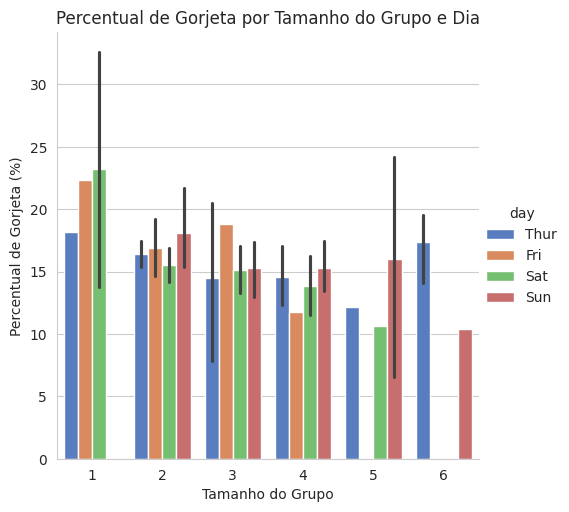

In [22]:
# Percentual de gorjeta por tamanho do grupo e dia

plt.figure(figsize = (12, 8))
sns.catplot(x = 'size', y = 'tip_percentage', hue = 'day', kind = 'bar', data = dados, palette='muted')
plt.title('Percentual de Gorjeta por Tamanho do Grupo e Dia')
plt.xlabel('Tamanho do Grupo')
plt.ylabel('Percentual de Gorjeta (%)')

plt.show()

**Observação**

<p align="justify">
O gráfico de barras mostra o percentual de gorjeta (tip_percentage) por tamanho do grupo (size) e dia da semana, com uma tendência geral de decréscimo no percentual à medida que o tamanho do grupo aumenta. Para grupos de 1 a 3 pessoas, os percentuais variam entre 15% e 25%, com destaque para quinta-feira (Thur) e sábado (Sat) em grupos de 1 pessoa, alcançando cerca de 22-25%. Nos grupos de 4 a 6, o percentual cai para 10-15%, sendo o domingo (Sun) o dia com menor média, especialmente em grupos de 6, onde fica abaixo de 10%. As barras de erro indicam variabilidade significativa, sugerindo que o percentual de gorjeta não é uniforme dentro de cada categoria.

<p align="justify">
Essa redução no percentual de gorjeta em grupos maiores é consistente com a correlação negativa entre size e tip_percentage (-0.14) observada na matriz de correlação, possivelmente devido a contas mais altas diluindo o percentual. A variação por dia, com quinta-feira e sábado mostrando percentuais mais altos em grupos menores, pode refletir diferentes dinâmicas sociais ou valores de conta.

**Visualizações Avançadas**

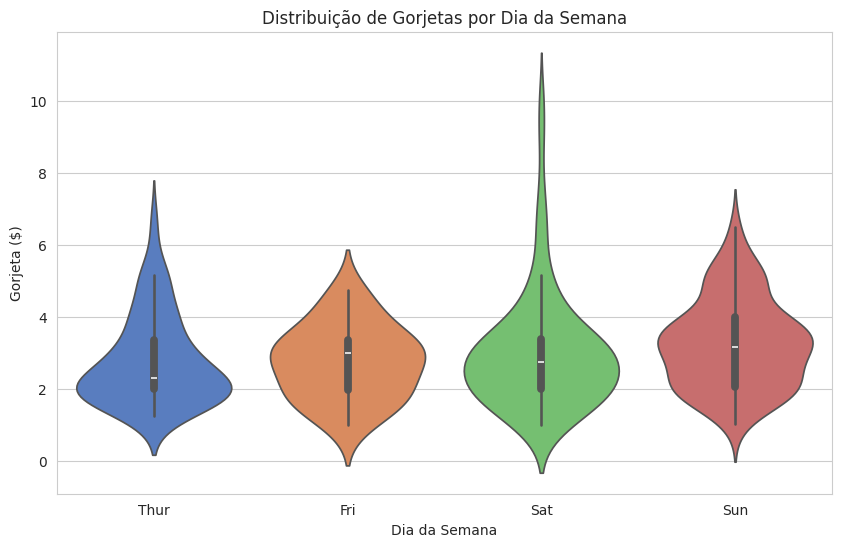

In [23]:
# Gráfico de violino para gorjetas por dia

plt.figure(figsize=(10, 6))
sns.violinplot(x = 'day', y = 'tip', data = dados,
               hue = 'day', palette = 'muted', legend = False)
plt.title('Distribuição de Gorjetas por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Gorjeta ($)')

plt.show()

**Observação**

<p align="justify">
O gráfico de violino mostra a distribuição das gorjetas (tip) por dia da semana, revelando variações na forma e na amplitude dos dados. O sábado (Sat) apresenta a maior concentração de gorjetas, com um pico próximo de 3.0 e uma cauda superior que se estende até cerca de 10, indicando maior variabilidade e alguns valores atípicos elevados. Quinta-feira (Thur) e domingo (Sun) têm distribuições mais simétricas, com medianas em torno de 2.5-3.0 e uma amplitude menor, enquanto sexta-feira (Fri) mostra uma distribuição mais uniforme entre 2.0 e 4.0, com menos extremos.

<p align="justify">
Essas diferenças sugerem que o sábado pode estar associado a contextos de maior generosidade ou grupos maiores, alinhando-se com a gorjeta média mais alta observada anteriormente. A menor variabilidade em quinta-feira e domingo pode refletir um comportamento mais consistente de gorjetas, possivelmente influenciado por horários ou tipos de refeição.

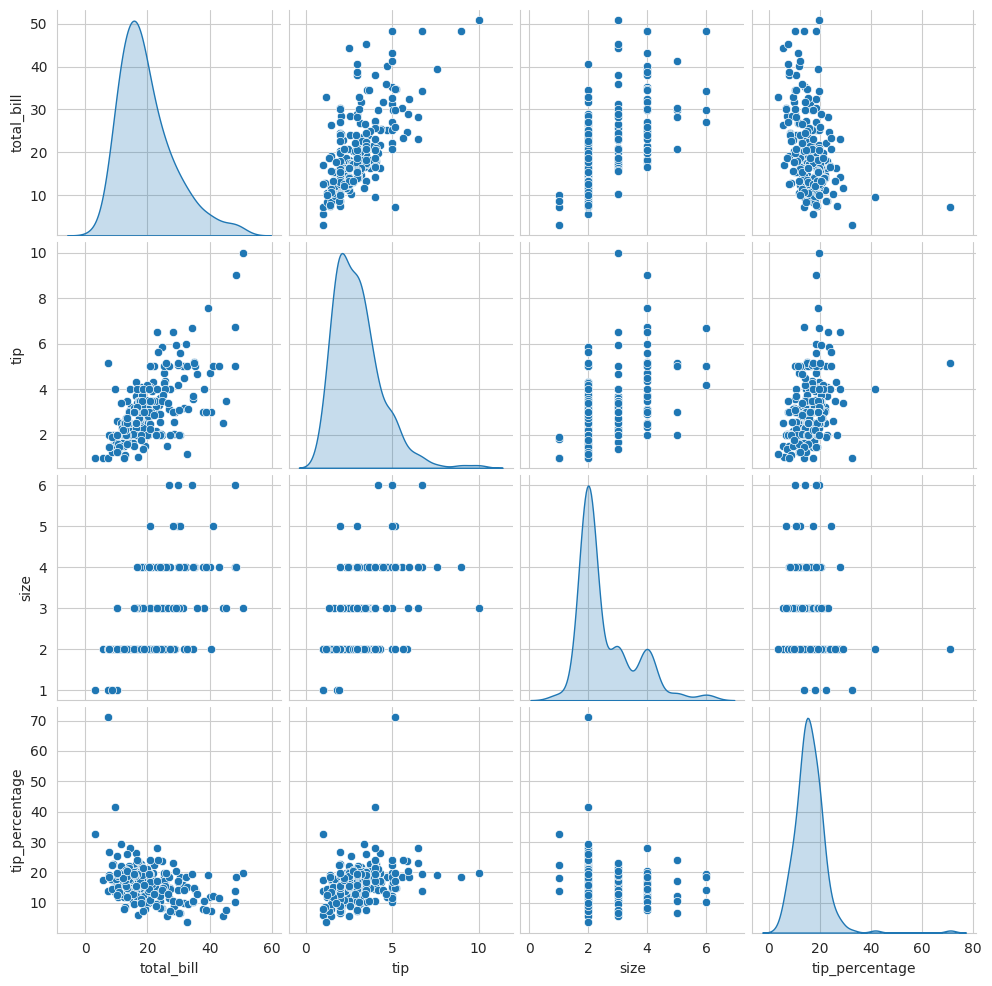

In [24]:
# Pairplot para variáveis numéricas
sns.pairplot(dados[['total_bill',
                    'tip',
                    'size',
                    'tip_percentage']],
             diag_kind='kde')

plt.show()

**Observação**

<p align="justify">
O pairplot revela a relação entre as variáveis numéricas total_bill, tip, size, e tip_percentage, com histogramas (kde) na diagonal e gráficos de dispersão nos pares. A distribuição de total_bill é assimétrica à direita, com pico em torno de 20, enquanto tip segue um padrão semelhante, concentrado entre 2 e 3, refletindo a correlação positiva moderada (0.68) observada anteriormente. O gráfico de dispersão entre total_bill e tip confirma essa tendência, com maior densidade de pontos em valores menores, mas com alguns outliers em gorjetas altas para contas maiores.

<p align="justify">
A variável size mostra uma distribuição enviesada para grupos de 2 a 3 pessoas, com poucos casos acima de 5, e exibe uma relação positiva com total_bill e tip, sugerindo que grupos maiores tendem a gerar contas e gorjetas mais altas. Já tip_percentage tem uma distribuição com pico em torno de 15-20%, mas com cauda longa até 60%, indicando variabilidade, e sua relação negativa com total_bill (-0.34) é visível na dispersão, onde percentuais mais altos ocorrem em contas menores.

### **Considerações Finais**

<p align="justify">
A análise exploratória de dados (EDA) realizada neste projeto revelou padrões significativos no comportamento de gastos e gorjetas, destacando a importância dessa etapa para embasar decisões de negócio. Observamos que total_bill e tip apresentam distribuições assimétricas à direita, com concentrações entre 15-20 e 2-3, respectivamente, e caudas até 50 e 10, indicando outliers que refletem transações atípicas. A correlação positiva entre total_bill e tip (0.68) e entre size e tip (0.49) mostra que grupos maiores, especialmente no jantar e nos fins de semana (sábado e domingo, com médias de $3.0-$3.2), geram contas e gorjetas mais altas, enquanto o percentual de gorjeta (tip_percentage) é maior em grupos menores (até 25% em quinta-feira e sábado), mas diminui com contas maiores (-0.34 com total_bill).

<p align="justify">
A EDA foi fundamental para identificar essas relações e variabilidades, como a maior dispersão de gorjetas no sábado e a predominância de jantares nos fins de semana, permitindo segmentar clientes e sugerir estratégias como incentivos para gorjetas percentuais em almoços e promoções para grupos maiores nos fins de semana. Além disso, a análise de outliers em total_bill (acima de 40) e tip (até 10) destacou a necessidade de investigações futuras sobre contextos específicos (e.g., tipo de refeição ou dia). Esse processo inicial, essencial para compreender os dados e orientar análises mais avançadas, demonstra como a EDA é uma ferramenta poderosa para transformar dados brutos em insights acionáveis, otimizando decisões e maximizando resultados de forma fundamentada.